In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
data = pd.read_csv('imdb.txt')
data.head()

,class,clean_text
0,0,slow moving aimless movie distressed drifting ...
1,0,not sure lost flat characters audience nearly ...
2,0,attempting artiness black white clever camera ...
3,0,little music anything speak
4,1,best scene movie gerardo trying find song keep...


In [2]:
Y = data['class'].values
X = data['clean_text'].values

In [3]:
data.shape

(746, 2)

In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase): this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) # this is random splitting


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_bow = vectorizer.transform(X_train)
X_cv_bow = vectorizer.transform(X_cv)
X_test_bow = vectorizer.transform(X_test)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
vectorizer = CountVectorizer()
x_train_bow = vectorizer.fit_transform(X_train)
x_cv_bow = vectorizer.fit_transform(X_cv)
x_test_bow = vectorizer.fit_transform(X_test)

print(x_train_bow.shape, y_train.shape)
print(x_cv_bow.shape, y_cv.shape)
print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")


(334,) (334,)
(165,) (165,)
(247,) (247,)
After vectorizations
(334, 1548) (334,)
(165, 1548) (165,)
(247, 1548) (247,)
YOU SHOULD NOT DO SOMETHING LIKE THIS
(334, 1548) (334,)
(165, 829) (165,)
(247, 1633) (247,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


<pre>
<h2> <font color='red'>YOU SHOULD NOT DO LIKE THIS </font></h2>
1.  <font color='red'>THE VOCABULARY SHOULD BUILT ONLY WITH THE WORDS OF TRAIN DATA</font>
    vectorizer = CountVectorizer()
    x_train_bow = vectorizer.fit_transform(X_train)
    x_cv_bow = vectorizer.fit_transform(X_cv)
    x_test_bow = vectorizer.fit_transform(X_test)
    
2.  <font color='red'>DATA LEAKAGE PROBLEM: IF WE DO LIKE THIS WE ARE LOOKING AT THE TEST DATA BEFORE MODELING</font>
    vectorizer = CountVectorizer()
    X_bow = vectorizer.fit_transfomr(X)
    X_train, X_test, y_train, y_test = train_test_split(X_bow, Y, test_size=0.33)
   
3. <font color='red'>YOU SHOULD PASS THE PROBABILITY SCORES NOT THE PREDICTED VALUES</font>
    y_pred =  neigh.predict(X)
    roc_auc_score(y_ture,y_pred)


</pre>

<pre>
<h2> <font color='red'>WHAT ARE THESE FUNCTIONS: FIT, TRANSFORM, FIT_TRANSFORM</font></h2>

When you do
<i><font color='blue'>vec =  CountVectorizer()</font></i>

then it will initiate the <i><font color='blue'>CountVectorizer</font></i> with default parameters.

<i><font color='blue'>vec.fit(Train_text)</font></i>: Means that internally it is only learning the vocabulary of `Text` i.e. unique n-grams

<i><font color='blue'>bag_of_words = vec.transform(Train_text)</font></i>: Means it is applying that learned parameters (vocabulary) to the data and thus giving you output i.e. words in Bag of words formate. 

Now, as you should know that the  <i>vocabulary(unique n-grams)</i> can be different for <i>Train Text</i> and <i>Test Text</i> thus they will give you different dimensional matrices for Train and Test. 

So what you should do is -  <i><font color='blue'>vec = CountVectorizer()</font></i>, <i><font color='blue'>vec.fit(Train_text)</font></i>

which learns the vocabulary of <i>Train Text</i> and then apply or transform your both <i>Train Text</i> and <i>Test Text</i>  using that  
learned vocabulary to ensure the same dimensions for both of them by doing -

<i><font color='blue'>bag_of_words_train = vec.transform(Train_text)</font></i>
and
<i><font color='blue'>bag_of_words_test = vec.transform(Test_text)</font></i>


so to conclude

<i><font color='blue'>
model =  CountVectorizer()
model.fit(train_text)
train_bow = model.transform(train_text)
test_bow = model.transform(test_text) 
</font></i>

or 
   
<i><font color='blue'>
model =  CountVectorizer()
train_bow = model.fit_transform(train_text)
test_bow = model.transform(test_text) 
</font></i>


</pre>

# Applying KNN

# 1: Hyper parameter Tuning (YOU CAN FOLLOW ANY ONE OF THESE)

## 1.1 Method 1: Simple for loop

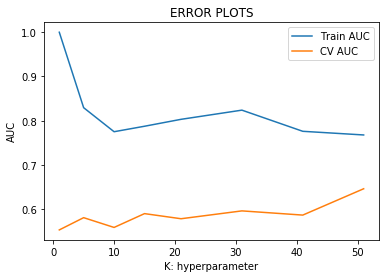

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded 
measure of decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_bow, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    # neigh.predict_proba returns probability estimates for the test data X in 
    # array of shape = [n_samples, n_classes]
    y_train_pred =  neigh.predict_proba(X_train_bow)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

## 1.2 Method 2: GridSearch or randomsearch

/home/prince/anaconda3/envs/mainEnv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


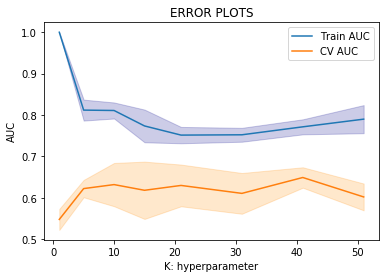

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 31, 41, 51]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_bow, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [17]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the 
# train and cv is less
# Note: based on the method you use you might get different hyperparameter values as best one
# so, you choose according to the method you choose, you use gridsearch if you are having more computing 
# power and note it will take more time if you increase the cv values in the GridSearchCV you will get 
# more rebust results.

# here we are choosing the best_k based on forloop results
best_k = 10

# 2. Testing with Test data

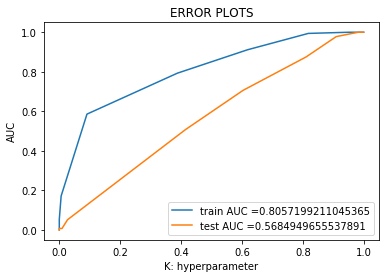

Train confusion matrix
[[150  15]
 [ 70  99]]
Test confusion matrix
[[65 46]
 [67 69]]


In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test_bow)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, neigh.predict(X_train_bow)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test_bow)))

<pre>

<h3><font color='blue'>IF Your system is getting stuck when you are working with the Knn: <font color='green'>YOU NEED TO USE BATCH WISE PREDICTION</font></font></h4>

neigh = KNeighborsClassifier(n_neighbors=i)
neigh.fit(X_train_bow, y_train)

# instead of predicting all the data points at a time, we will predict 1000 data points at a time
# you might need to change this code as per requirement
# please try to debug errors on your own, read the errors and try to understand it.
# you should be able to resolve them on your own as you wrote that code :)
# use as many print statements as possible and make sure whats happening in the code
# read the documentation of functions and get the sense out of it

y_train_pred = []
for i in range(0, X_train.shape[0], 1000):
    y_train_pred.extend(neigh.predict_proba(X_train_bow[i,i+1000])[:,1]) # this is a pseudo code

y_cv_pred = []
for i in range(0, X_cv.shape[0], 1000):
    y_cv_pred.extend(neigh.predict_proba(X_cv_bow[i,i+1000])[:,1]) # this is a pseudo code
    

train_auc.append(roc_auc_score(y_train,y_train_pred))
cv_auc.append(roc_auc_score(y_cv, y_cv_pred))


</pre>